In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.iloc[:, :5]

,Suburb,Address,Rooms,Type,Price
0,Abbotsford,68 Studley St,2,h,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0
3,Abbotsford,18/659 Victoria St,3,u,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0
...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0
34853,Yarraville,29A Murray St,2,h,888000.0
34854,Yarraville,147A Severn St,2,t,705000.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0


In [4]:
shape = df.shape
num_rows, num_columns = shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 34857
Number of Columns: 21


In [5]:
size = df.size
print(f"Size of the Dataset: {size}")

Size of the Dataset: 731997


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [9]:
#convert object to categorical
for column in object_columns:
    df[column] = df[column].astype('category')

In [10]:
duplicates = df.duplicated(subset=None, keep='first')

In [11]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
from scipy import stats

In [13]:
#Calculate Z-Scores
z_scores_landsize = np.abs(stats.zscore(df['Landsize']))
z_scores_buildingarea = np.abs(stats.zscore(df['BuildingArea']))

In [14]:
#Define Z-Score Threshold
z_score_threshold = 2

In [15]:
#Remove Outliers
df_no_outliers = df[(z_scores_landsize < z_score_threshold) & (z_scores_buildingarea < z_score_threshold)]

In [16]:
print("Original DataFrame Shape:", df.shape)
print("DataFrame without Outliers Shape:", df_no_outliers.shape)

Original DataFrame Shape: (34856, 21)
DataFrame without Outliers Shape: (0, 21)


In [17]:
#identify missing value
missing_values = df.isnull().sum()
print("Missing Values in the Dataset:")
print(missing_values)

Missing Values in the Dataset:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [18]:
categorical_columns = ['Bathroom', 'Car']

for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]
    df[column] = df[column].fillna(mode_value)

In [19]:
missing_values_after_filling = df.isnull().sum()
print("Missing Values After Filling:")
print(missing_values_after_filling)

Missing Values After Filling:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


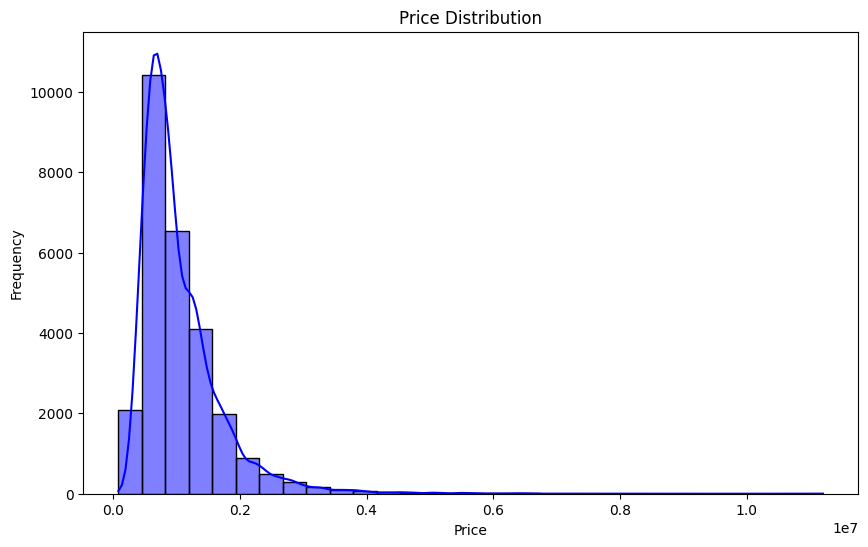

In [20]:
#histogram
plt.figure(figsize=(10, 6))

# Create a histogram for the 'Price' column
sns.histplot(df['Price'], bins=30, kde=True, color='blue')

# Customize the plot
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

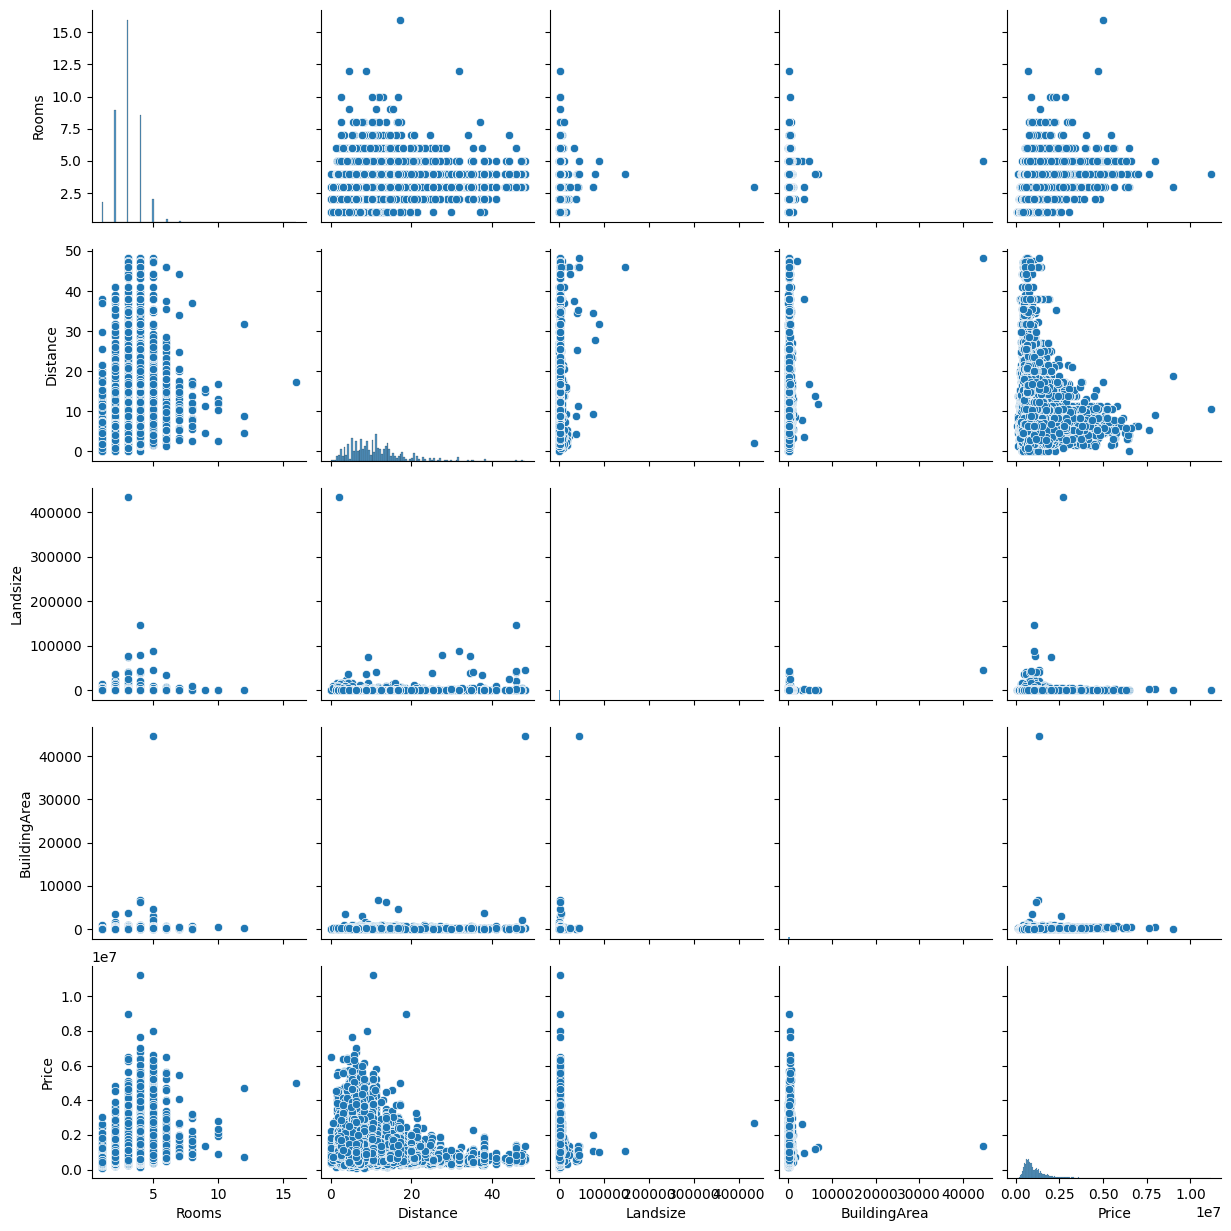

In [21]:
#Pair Plot
numerical_columns = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'Price']
sns.pairplot(df[numerical_columns])
plt.show()

<ipython-input-22-422425fe6b6e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


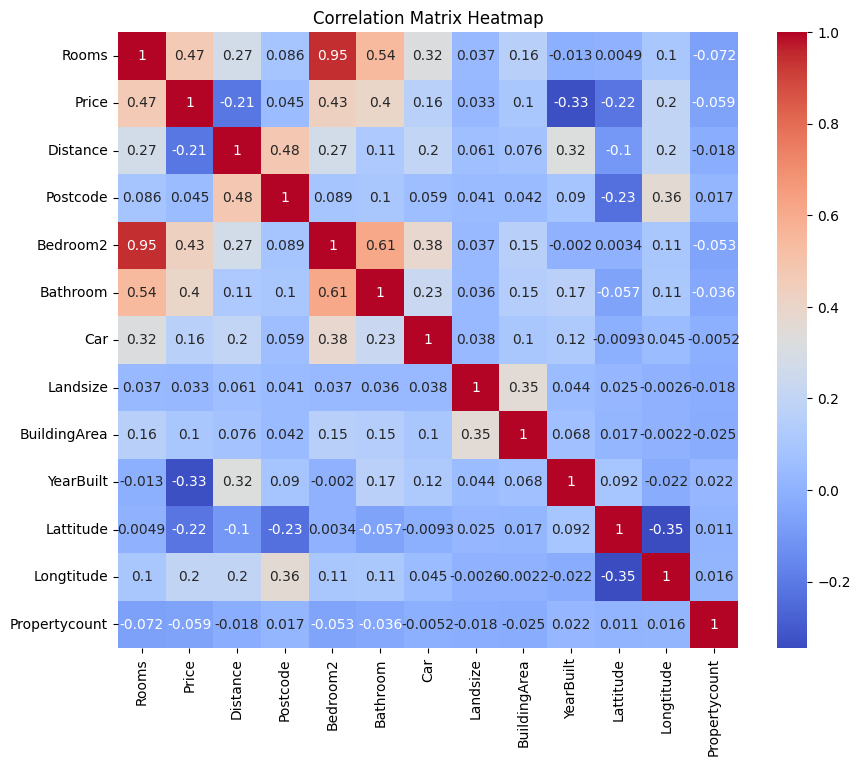

In [22]:
#correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Define X and y variables
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split data into a train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# Train the models using preprocessed data
for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
# Evaluate the models using test data
for model_name, model_info in models.items():
    model = model_info['model']
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")


In [ ]:
# Initialize variables to keep track of the best model and its metrics
best_model = None
best_mae = float('inf')
best_mse = float('inf')
best_rmse = float('inf')
best_r2 = -float('inf')

# Evaluate the models using test data
for model_name, model_info in models.items():
    model = model_info['model']
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics for each model
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print("\n")

    # Check if the current model outperforms the best model
    if mae < best_mae:
        best_model = model_name
        best_mae = mae
        best_mse = mse
        best_rmse = rmse
        best_r2 = r2

# Choose the best-performing model
print(f"The best model is: {best_model}")
print(f"Best Mean Absolute Error (MAE): {best_mae}")
print(f"Best Mean Squared Error (MSE): {best_mse}")
print(f"Best Root Mean Squared Error (RMSE): {best_rmse}")
print(f"Best R-squared (R2): {best_r2}")
